In [122]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

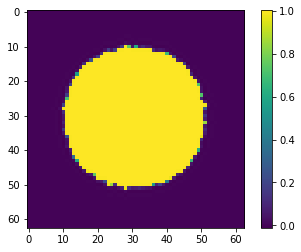

In [123]:
phi_plot = np.array(scipy.io.loadmat('phi_plot.mat')['phi_plot'])
plt.imshow(phi_plot)
plt.colorbar()

In [128]:
def sum_filter_1(phi):
    [Nx,Ny] = phi.shape
    phi = np.round(phi)

    phi_sum = np.zeros([Nx,Ny])
    for i in range(5,Nx-4):
        for k in range(5,Ny-4):
            for j in range(k-4,k+4+1):
                phi_sum[i,k] = phi_sum[i,k] + int(phi[i,k]==phi[i-4,j])*phi[i-4,j] + int(phi[i,k]==phi[i-3,j])*phi[i-3,j] + int(phi[i,k]==phi[i-2,j])*phi[i-2,j] + int(phi[i,k]==phi[i-1,j])*phi[i-1,j] + int(phi[i,k]==phi[i-0,j])*phi[i,j] + int(phi[i,k]==phi[i+1,j])*phi[i+1,j] + int(phi[i,k]==phi[i+2,j])*phi[i+2,j] + int(phi[i,k]==phi[i+3,j])*phi[i+3,j] + int(phi[i,k]==phi[i+4,j])*phi[i+4,j]

    phi_sum = np.divide(phi,phi_sum)
    phi_sum[np.isnan(phi_sum)] = 0
    phi_sum_max = np.amax(np.amax(phi_sum))
    phi_sum = np.divide(phi_sum,phi_sum_max)

    phi_sum_temp = phi_sum
    cutoff = np.percentile(np.reshape(phi_sum_temp,[Nx*Ny,1]),99.97)
    phi_sum[phi_sum<cutoff] = 0
    phi_sum[phi_sum!=1] = 0
    return phi_sum

C:\Users\Kuanr\AppData\Local\Temp\ipykernel_32204\669561670.py:11: RuntimeWarning: invalid value encountered in true_divide
  phi_sum = np.divide(phi,phi_sum)


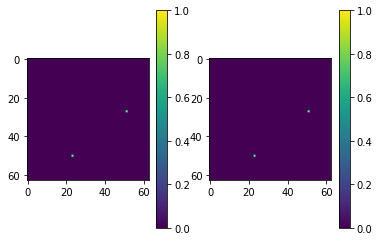

In [130]:
import matlab.engine
eng = matlab.engine.start_matlab()
matlab_tips = np.round(eng.sum_filter(matlab.double(np.array(phi_plot).astype('float64')),0))
eng.quit()

python_tip = sum_filter_1(phi_plot)
plt.subplot(1,2,1)
plt.imshow(matlab_tips)
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(python_tip)
plt.colorbar()